# Google Search Behavior Analysis

* by Levi | https://github.com/levi-kh

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Import search data from CSV
df = pd.read_csv("google_search_history_sample.csv")

In [6]:
df.head()

,timestamp,search_query,category
0,2025-06-11 21:41:00,upcoming marvel movies,entertainment
1,2025-05-28 10:53:00,best protein bars 2025,food & beverage
2,2025-04-09 19:17:00,HIIT workout 20 minutes,fitness
3,2025-04-03 08:27:00,how to write a resume 2025,career
4,2025-04-15 09:16:00,how to make cold brew coffee,food & beverage


In [10]:
#convert from object to timestamp
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [37]:
#Create hour column and day_of_week column
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.day_name()

In [13]:
df.head()

,timestamp,search_query,category,hour,day of week
0,2025-06-11 21:41:00,upcoming marvel movies,entertainment,21,Wednesday
1,2025-05-28 10:53:00,best protein bars 2025,food & beverage,10,Wednesday
2,2025-04-09 19:17:00,HIIT workout 20 minutes,fitness,19,Wednesday
3,2025-04-03 08:27:00,how to write a resume 2025,career,8,Thursday
4,2025-04-15 09:16:00,how to make cold brew coffee,food & beverage,9,Tuesday


In [26]:
#Question 1: What time of day does this person search the most?
search_by_hour = df['hour'].value_counts().sort_index()
print(search_by_hour)

hour
6     24
7     22
8     29
9     15
10    24
11    26
12    21
13    21
14    24
15    22
16    20
17    26
18    19
19    31
20    17
21    16
22    23
23    20
Name: count, dtype: int64


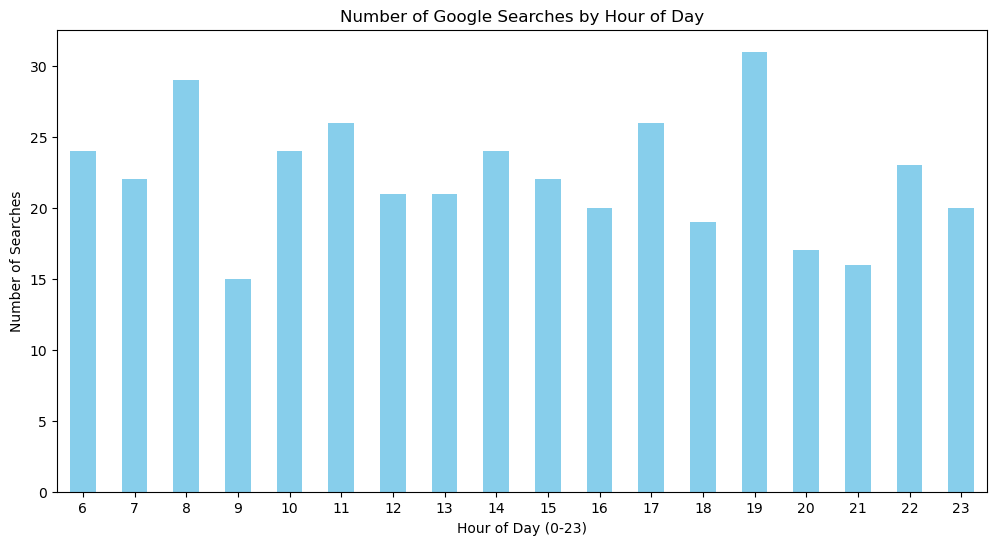

In [24]:
#Create bar chart
plt.figure(figsize=(12,6))
search_by_hour.plot(kind='bar',color='skyblue')
plt.title('Number of Google Searches by Hour of Day')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Number of Searches')
plt.xticks(rotation=0)
plt.show()

In [35]:
#Question 2: What topics do they search for most often?
category_counts = df['category'].value_counts().sort_index(ascending=False)
print(category_counts)

category
technology         41
relationships      54
mental health      68
lifestyle          47
food & beverage    45
fitness            46
entertainment      46
career             53
Name: count, dtype: int64


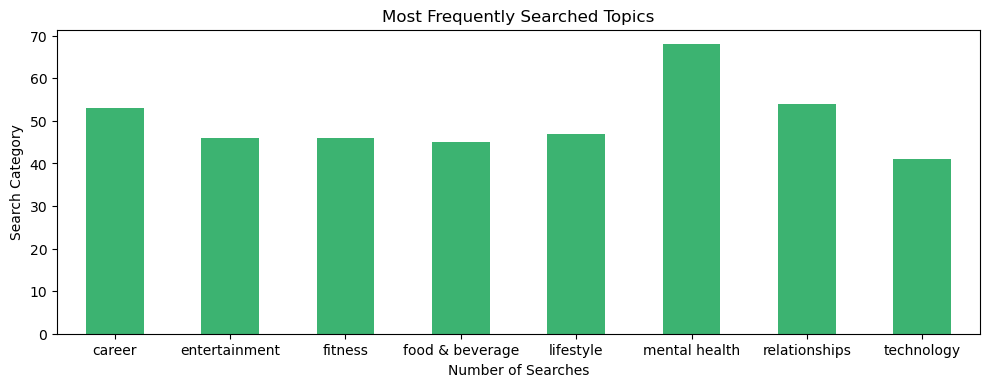

In [34]:
#Create bar chart
plt.figure(figsize=(10,5))
category_counts.plot(kind='bar',color='mediumseagreen')
plt.title('Most Frequently Searched Topics')
plt.xlabel('Number of Searches')
plt.ylabel('Search Category')
plt.tight_layout()
plt.xticks(rotation=0)
plt.show()

In [38]:
#Question 3: Do they tend to Google more on weekends or weekdays?
day_counts = df['day_of_week'].value_counts()
print(day_counts)

day_of_week
Wednesday    66
Saturday     64
Friday       63
Sunday       60
Monday       53
Tuesday      48
Thursday     46
Name: count, dtype: int64


In [39]:
df['is_weekend'] = df['day_of_week'].isin(['Friday','Saturday','Sunday'])
df['is_weekday'] = df['day_of_week'].isin(['Monday','Tuesday','Wednesday','Thursday'])

In [42]:
weekend_count = df[df['is_weekend'] == True].shape[0]
weekday_count = df[df['is_weekend'] == False].shape[0]

print(f"Weekend searches: {weekend_count}")
print(f"Weekday searches: {weekday_count}")

Weekend searches: 187
Weekday searches: 213


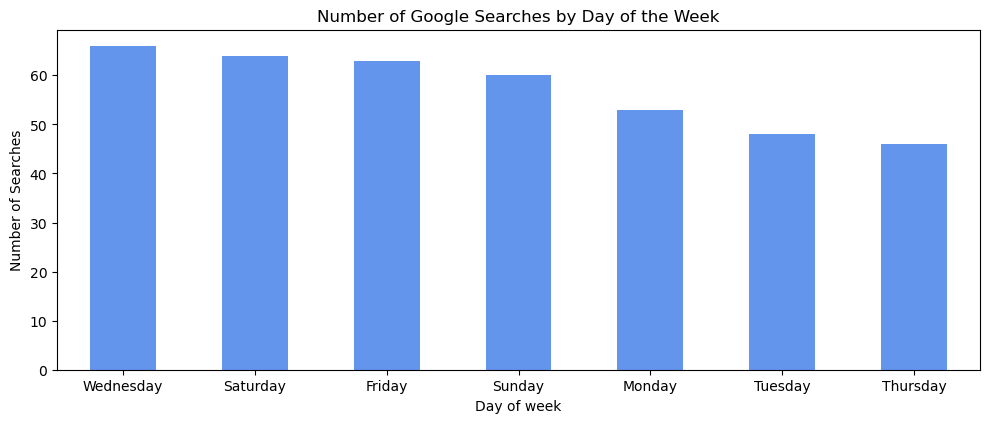

In [43]:
plt.figure(figsize=(10,5))
day_counts.plot(kind='bar',color='cornflowerblue')
plt.title("Number of Google Searches by Day of the Week")
plt.xlabel('Day of week')
plt.ylabel('Number of Searches')
plt.tight_layout()
plt.xticks(rotation=0)
plt.show()

In [44]:
#Question 4: Are there any repeated keywords?

#Convert all queries to lowercase
df['search_query_cleaned'] = df['search_query'].str.lower().str.strip()

In [47]:
repeated_queries = df['search_query_cleaned'].value_counts()
repeated_queries = repeated_queries[repeated_queries > 1]
print(repeated_queries)

search_query_cleaned
symptoms of anxiety vs stress          20
best gifts for girlfriend birthday     15
how to sleep better                    14
upcoming marvel movies                 14
how to apologize sincerely             13
meditation music for focus             13
how to write a resume 2025             13
yoga for lower back pain               13
chest workout at home no equipment     12
how to negotiate salary                12
how to make cold brew coffee           11
is project management a good career    11
vpn recommendation reddit              11
vegan breakfast recipes                11
minimalist home office setup           11
online therapy reviews                 11
daily routine for productivity         10
iphone 16 vs samsung galaxy s25        10
morning habits of successful people    10
top netflix shows july 2025            10
do i have burnout                      10
signs someone likes you                10
certifications for data analyst         9
first date co

In [ ]:
import nltk
nltk.download('stopwords') #download the stopwords list (common words like "the", "and")
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english')) #get English stopwords as a set

In [60]:
from collections import Counter

#Combine all search queries into one string
all_queries = ' '.join(df['search_query_cleaned'])

#Split the words
words = all_queries.lower().split()

#create bigrams
bigrams = [f"{words[i]} {words[i+1]}" for i in range(len(words)-1)]

bigram_counts = Counter(bigrams)

for phrase, freq in bigram_counts.most_common(50):
    print(f"{phrase}:{freq}")


how to:83
symptoms of:20
of anxiety:20
anxiety vs:20
vs stress:20
for productivity:17
best gifts:15
gifts for:15
for girlfriend:15
girlfriend birthday:15
upcoming marvel:14
marvel movies:14
to sleep:14
sleep better:14
to write:13
write a:13
a resume:13
resume 2025:13
meditation music:13
music for:13
for focus:13
to apologize:13
apologize sincerely:13
yoga for:13
for lower:13
lower back:13
back pain:13
to negotiate:12
negotiate salary:12
chest workout:12
workout at:12
at home:12
home no:12
no equipment:12
to make:11
make cold:11
cold brew:11
brew coffee:11
minimalist home:11
home office:11
office setup:11
online therapy:11
therapy reviews:11
vegan breakfast:11
breakfast recipes:11
vpn recommendation:11
recommendation reddit:11
is project:11
project management:11
management a:11
